In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import seaborn as sns
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil
!{sys.executable} -m pip install tensorflow-addons

import os
from shutil import unpack_archive
pd.set_option("display.max_columns", 101)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import tqdm
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# Download dan extract dataset

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ" -O dataset.zip && rm -rf /tmp/cookies.txt

unpack_archive('dataset.zip', '')

os.remove('dataset.zip')

--2022-07-25 09:35:26--  https://docs.google.com/uc?export=download&confirm=t&id=1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ
Resolving docs.google.com (docs.google.com)... 74.125.68.113, 74.125.68.139, 74.125.68.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.68.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lmcpsagajecrftl8g2ehg8n7obo16qfs/1658741700000/11309364930090306574/*/1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ?e=download&uuid=fcda4713-cfe7-4e4a-a884-5dc63cb86c8a [following]
--2022-07-25 09:35:27--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lmcpsagajecrftl8g2ehg8n7obo16qfs/1658741700000/11309364930090306574/*/1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ?e=download&uuid=fcda4713-cfe7-4e4a-a884-5dc63cb86c8a
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.251.12.132, 2404

In [27]:
# get label
label = os.listdir('train')
print(label)

['angry', 'fear', 'neutral', 'happy', 'surprise', 'sad', 'disgust']


In [28]:
data_label = []
for nama_label in label:
    jumlah = len(os.listdir(os.path.join('train', nama_label)))
    #print(jumlah)
    detail_label = [nama_label, jumlah]
    data_label.append(detail_label)

print(data_label)

[['angry', 3993], ['fear', 4103], ['neutral', 4982], ['happy', 7164], ['surprise', 3205], ['sad', 4938], ['disgust', 436]]


In [29]:
df_label = pd.DataFrame(data_label)
df_label.columns = ['Ekspresi', 'Jumlah']
df_label

,Ekspresi,Jumlah
0,angry,3993
1,fear,4103
2,neutral,4982
3,happy,7164
4,surprise,3205
5,sad,4938
6,disgust,436


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


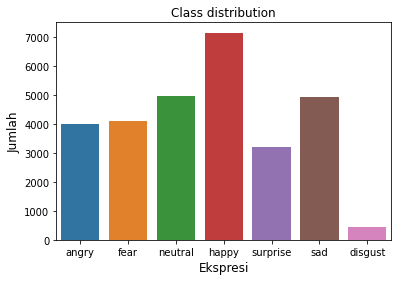

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(df_label.Ekspresi, df_label.Jumlah)
plt.title('Class distribution')
plt.ylabel('Jumlah', fontsize=12)
plt.xlabel('Ekspresi', fontsize=12)
plt.show()

In [31]:
# Jumlah data training

jumlah_training = 0
jumlah_validation = 0 
for nama_label in label:
    jumlah_train = len(os.listdir(os.path.join('train', nama_label)))
    jumlah_val = len(os.listdir(os.path.join('validation', nama_label)))
    jumlah_training += jumlah_train
    jumlah_validation += jumlah_val

print('jumlah data training sebanyak', jumlah_training)
print('jumlah data validaiton sebanyak', jumlah_validation)

jumlah data training sebanyak 28821
jumlah data validaiton sebanyak 7066


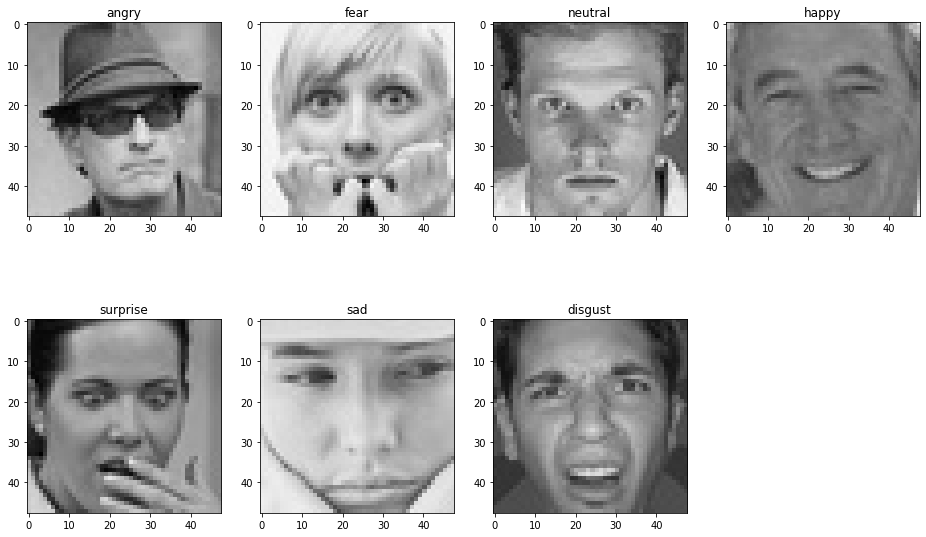

In [32]:
def gambarWajah(gambar, jenis_ekpresi, path):
    #pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    #img = np.array(pixels.split())
    gambar_dir = os.path.join(path, jenis_ekpresi)
    gambar_path = os.path.join(gambar_dir, gambar)
    img = mpimg.imread(gambar_path)
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), jenis_ekpresi], dtype=object)

plt.figure(0, figsize=(16,10))
i = 1;
for nama_ekspresi in label:
    #print(nama_ekspresi)
    gambar_dir = os.path.join('train', nama_ekspresi)
    list_gambar_ekspresi = os.listdir(gambar_dir)
    nama_gambar = list_gambar_ekspresi[0]
    img = gambarWajah(nama_gambar, nama_ekspresi, 'train')
    plt.subplot(2,4,i)
    plt.imshow(img[0])
    plt.title(img[1])
    i+=1

plt.show()  

In [33]:
# Membuat Dataframe

data_foto_1 = []
nama_class_1 = []
for label in os.listdir(os.path.join('train')):
  for img in os.listdir(os.path.join('train', label)):
    data_foto_1.append(img)
    nama_class_1.append(label)

training_df = pd.DataFrame({'image' : data_foto_1, 'label' : nama_class_1})

data_foto_2 = []
nama_class_2 = []
for label in os.listdir(os.path.join('validation')):
  for img in os.listdir(os.path.join('validation', label)):
    data_foto_2.append(img)
    nama_class_2.append(label)

validation_df = pd.DataFrame({'image' : data_foto_2, 'label' : nama_class_2})

training_df.info()
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28821 entries, 0 to 28820
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   28821 non-null  object
 1   label   28821 non-null  object
dtypes: object(2)
memory usage: 450.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7066 entries, 0 to 7065
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   7066 non-null   object
 1   label   7066 non-null   object
dtypes: object(2)
memory usage: 110.5+ KB


In [34]:
#initilize parameters
epochs = 2
batch_size = 64
image_size = (48,48)
image_shape = image_size + (3,)

In [35]:
# Image Data Generator
train_datagen = ImageDataGenerator(
      # featurewise_center = True,
      # featurewise_std_normalization = True,
      rotation_range = 10,
      width_shift_range = 0.1,
      height_shift_range = 0.1,
      zoom_range = 0.1,
      horizontal_flip = True,
      fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(horizontal_flip = True)

In [36]:
# Preprocess Data Biasa

train_generator = train_datagen.flow_from_directory(
    "train/",
    target_size=image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = "categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    "validation/",
    target_size=image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = "categorical"
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Data Augmentation

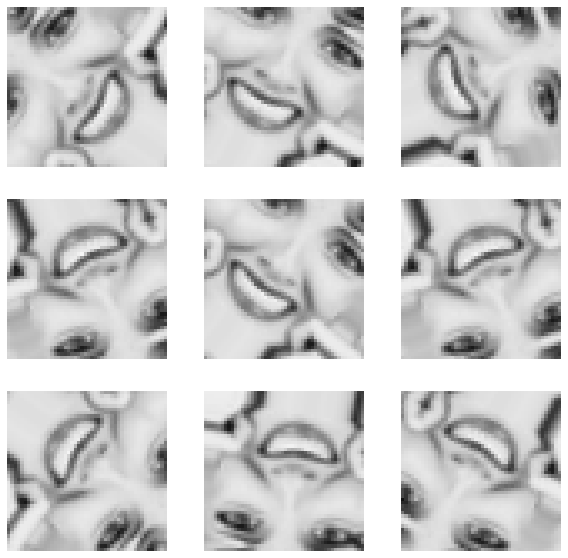

In [37]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
])

for image, _ in next(zip(train_generator)):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

Model terbaik saat ini dengan akurasi train 0.59 dan akurasi validation 0.60 adalah
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(48,48,1)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(7, activation="softmax")
])

In [38]:
VGG16_base_model = tf.keras.applications.VGG16(input_shape = image_shape, include_top = False, weights = 'imagenet')

VGG16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [39]:
VGG16_base_model.trainable = False

VGG16_model = tf.keras.Sequential()
VGG16_model.add(tf.keras.layers.Rescaling(1./255, input_shape = image_shape))
VGG16_model.add(data_augmentation)
VGG16_model.add(VGG16_base_model)
VGG16_model.add(tf.keras.layers.Flatten())
VGG16_model.add(tf.keras.layers.Dense(2048, activation = 'relu'))
VGG16_model.add(tf.keras.layers.Dense(7, activation = 'softmax'))

VGG16_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 sequential_2 (Sequential)   (None, 48, 48, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 2048)              1050624   
                                                                 
 dense_3 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 15,779,655
Trainable params: 1,064,967
N

In [40]:
# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

VGG16_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
# Fit model

VGG16_history = VGG16_model.fit(train_generator,validation_data = validation_generator, verbose = 0, batch_size=batch_size , epochs = epochs,callbacks=[tqdm_callback])

Training:   0%|           0/2 ETA: ?s,  ?epochs/s

Epoch 1/2


0/451           ETA: ?s - 

Epoch 2/2


0/451           ETA: ?s - 

In [42]:
VGG16_model.save('VGG16_transfer_learning.h5')

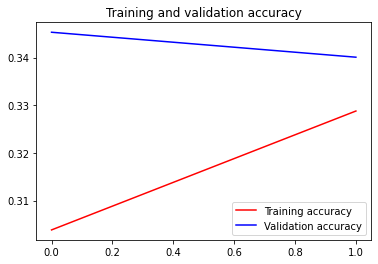

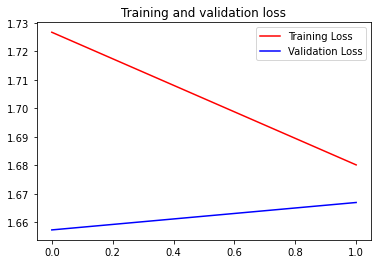

In [43]:
acc = VGG16_history.history['accuracy']
val_acc = VGG16_history.history['val_accuracy']
loss = VGG16_history.history['loss']
val_loss = VGG16_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Confusing Matrix
Train Dataset

Confusion Matrix
[[  60    0  174 2421  429  200  709]
 [   5    0   21  262   51   22   75]
 [  59    0  165 2446  430  204  799]
 [ 103    0  314 4300  713  365 1369]
 [  59    0  219 3044  498  261  901]
 [  76    0  196 2965  538  285  878]
 [  42    0  142 1907  343  140  631]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.02      0.03      3993
     disgust       0.00      0.00      0.00       436
        fear       0.13      0.04      0.06      4103
       happy       0.25      0.60      0.35      7164
     neutral       0.17      0.10      0.12      4982
         sad       0.19      0.06      0.09      4938
    surprise       0.12      0.20      0.15      3205

    accuracy                           0.21     28821
   macro avg       0.14      0.14      0.11     28821
weighted avg       0.18      0.21      0.15     28821



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


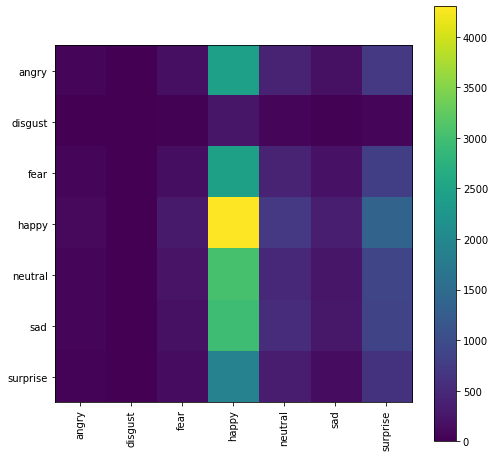

In [44]:
y_pred = VGG16_model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

Validation Dataset

Confusion Matrix
[[  14    0   47  580  111   27  181]
 [   1    0    2   56   10    5   37]
 [  15    0   53  633  107   29  181]
 [  23    0   98 1086  211   57  350]
 [  22    0   57  739  121   45  232]
 [  15    0   57  665  140   41  221]
 [  14    0   49  469   87   24  154]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.01      0.03       960
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.05      0.08      1018
       happy       0.26      0.60      0.36      1825
     neutral       0.15      0.10      0.12      1216
         sad       0.18      0.04      0.06      1139
    surprise       0.11      0.19      0.14       797

    accuracy                           0.21      7066
   macro avg       0.14      0.14      0.11      7066
weighted avg       0.17      0.21      0.15      7066



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


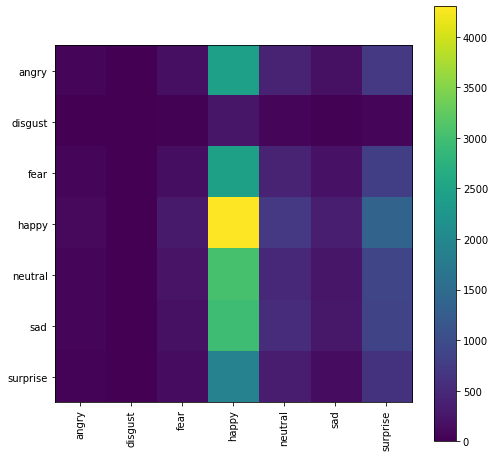

In [45]:
y_pred = VGG16_model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm_val = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_val)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

# Prediction

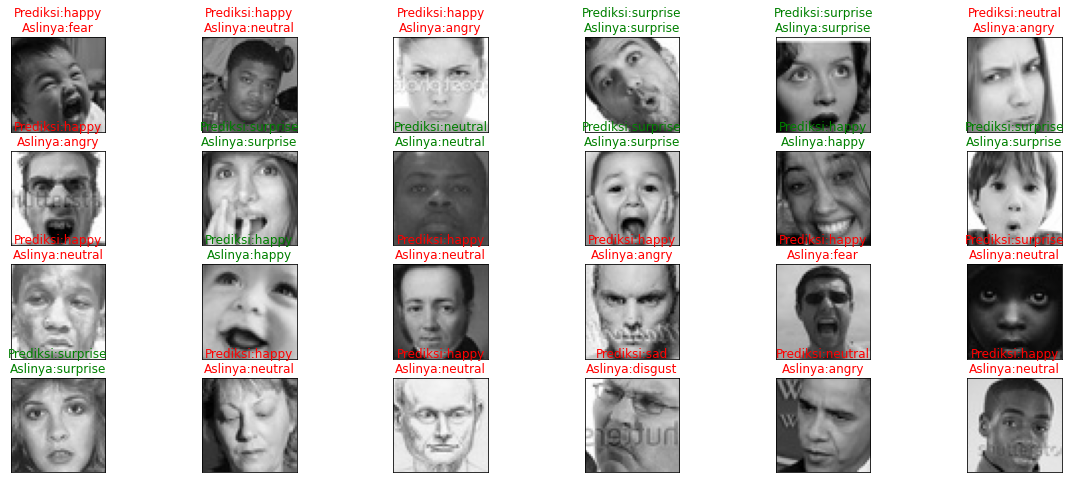

In [55]:
# x_test, y_test punya 64 gambar
x_test,y_test = next(validation_generator)
predict = VGG16_model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]).astype('uint8'))
    predict_index = class_labels[(np.argmax(predict[index]))]
    true_index = class_labels[(np.argmax(y_test[index]))]
    
    ax.set_title("Prediksi:{}\nAslinya:{}".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))